In [20]:
import pandas as pd
import numpy as np  


In [21]:
destination_dataset = pd.read_csv("dataset/Expanded_Destinations.csv")
users_dataset = pd.read_csv("dataset/Expanded_Users.csv")
reviews_dataset = pd.read_csv("dataset/Expanded_Reviews.csv")
history_dataset = pd.read_csv('dataset/Expanded_UserHistory.csv')

In [22]:
destination_dataset.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [23]:
users_dataset.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


In [24]:
reviews_dataset.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [25]:
history_dataset.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [26]:
merged_df = pd.merge(users_dataset, history_dataset, on='UserID')

# Basic Feature Engineering
# Group by UserID and aggregate information
user_dataset = merged_df.groupby('UserID').agg({
    'DestinationID': lambda x: list(x),  # List of visited destinations
    'ExperienceRating': 'mean',          # Average experience rating
    'NumberOfAdults': 'first',           # Assuming this does not change frequently
    'NumberOfChildren': 'first',         # Assuming this does not change frequently
    'Preferences': 'first'               # User preferences
}).reset_index()

user_dataset.head()

,UserID,DestinationID,ExperienceRating,NumberOfAdults,NumberOfChildren,Preferences
0,1,"[941, 467]",4.0,1,0,"Beaches, Historical"
1,2,"[385, 437]",3.5,2,2,"Nature, Adventure"
2,3,"[904, 421]",4.0,2,0,"City, Historical"
3,5,[425],3.0,2,2,"Nature, Adventure"
4,7,"[670, 953]",3.0,2,1,"Beaches, Historical"


In [27]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Sentiment analysis function
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']  # Compound score

# Apply sentiment analysis on review texts
# Assuming 'ReviewText' column exists in user_history_df
reviews_dataset['Sentiment'] = reviews_dataset['ReviewText'].apply(analyze_sentiment)

# Aggregate sentiment scores in user profiles
user_dataset = pd.merge(user_dataset, 
                         reviews_dataset.groupby('UserID')['Sentiment'].mean(), 
                         on='UserID')
user_dataset.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amanmehra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,UserID,DestinationID,ExperienceRating,NumberOfAdults,NumberOfChildren,Preferences,Sentiment
0,2,"[385, 437]",3.500000,2,2,"Nature, Adventure",0.0000
1,5,[425],3.000000,2,2,"Nature, Adventure",0.6360
2,15,"[222, 701, 481]",2.333333,1,2,"City, Historical",0.3180
3,16,"[970, 40, 176]",2.333333,1,2,"Beaches, Historical",0.6360
4,20,"[311, 674]",4.500000,2,0,"Nature, Adventure",0.3816


Steps undertaken include: 
Feature Engineering 
understadning user preferences and behaviour so here we have merged previous location travels by the same user to the user profile part of the dataset 
this will help to make further recommendationdation if they undertand that there is a pattern in the prefernces of the user 
Specificalling inclduiong group size divinded into adults and children to provide locations more prefered by groups of similar sizes 
NLP implemenmtation
Sentiment anaylysis on the reviews posted by the users so that we can enhance personlise reconmendations 
All these steps create a more holistic user profile so that we can perform better ercommendations

In [28]:
reviews_dataset.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText,Sentiment
0,1,178,327,2,Incredible monument!,0.000
1,2,411,783,1,Loved the beaches!,0.636
2,3,927,12,2,A historical wonder,0.000
3,4,358,959,3,Incredible monument!,0.000
4,5,989,353,2,Loved the beaches!,0.636


In [29]:
# Aggregate sentiment scores by DestinationID
destination_sentiments = reviews_dataset.groupby('DestinationID')['Sentiment'].mean().reset_index()

# Merge this with the destination profiles
destination_profiles = pd.merge(destination_dataset, destination_sentiments, on='DestinationID', how='left')

destination_profiles.head()


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit,Sentiment
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb,0.000
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,0.000
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar,NaN
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar,0.636
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun,0.000


In [30]:
destination_profiles.isna().sum()

DestinationID        0
Name                 0
State                0
Type                 0
Popularity           0
BestTimeToVisit      0
Sentiment          349
dtype: int64

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np


# Separate the destinations with and without missing Sentiment
missing_sentiment = destination_profiles[destination_profiles['Sentiment'].isna()]
not_missing_sentiment = destination_profiles[~destination_profiles['Sentiment'].isna()]

# Create and train a linear regression model
model = LinearRegression()
model.fit(not_missing_sentiment[['Popularity']], not_missing_sentiment['Sentiment'])

# Predict the missing Sentiment values
predicted_sentiments = model.predict(missing_sentiment[['Popularity']])
missing_sentiment['Sentiment'] = predicted_sentiments





/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_49012/4039788160.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_sentiment['Sentiment'] = predicted_sentiments


/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_49012/1519831152.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_sentiment['Sentiment'] = predicted_sentiments


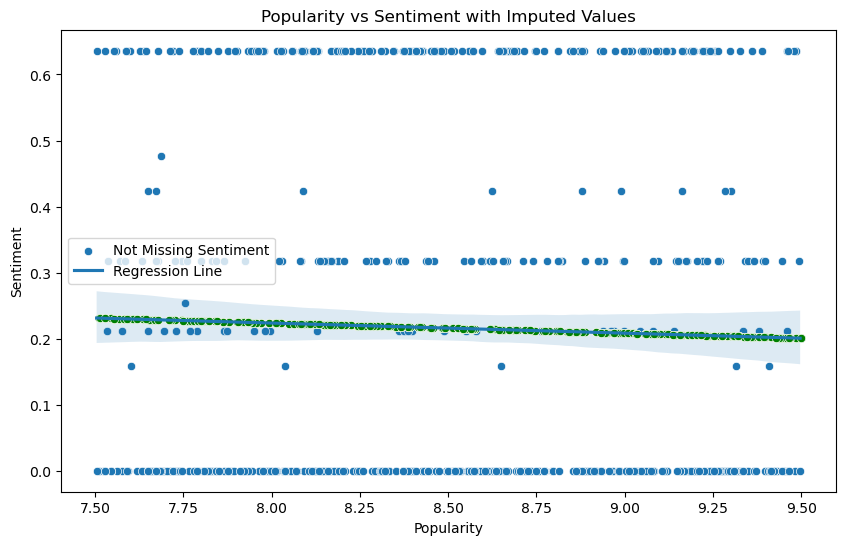

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for not_missing_sentiment data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Sentiment', data=not_missing_sentiment, label='Not Missing Sentiment')

# Regression line
sns.regplot(x='Popularity', y='Sentiment', data=not_missing_sentiment, scatter=False, label='Regression Line')

# Points for missing_sentiment data before imputation (assuming we know their Popularity)
sns.scatterplot(x='Popularity', y='Sentiment', data=missing_sentiment )

# Update missing_sentiment with the predicted values
missing_sentiment['Sentiment'] = predicted_sentiments

# Points for missing_sentiment data after imputation
sns.scatterplot(x='Popularity', y='Sentiment', data=missing_sentiment, color='green', )
plt.xlabel('Popularity')
plt.ylabel('Sentiment')
plt.title('Popularity vs Sentiment with Imputed Values')
plt.legend()
plt.show()


initially presummed that there was a coreelaltion between the sentiment value adn popularity of teh dataset we unbderstand that there is no relation when we fit a linear regssion model therefore we conclude no realtion understading that using simpleimputer with constant value of 0 suggesting no review is ideal


In [33]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy as 'constant' and fill value as 0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values in the Sentiment column
destination_profiles['Sentiment'] = imputer.fit_transform(destination_profiles[['Sentiment']])

# Check the result
destination_profiles.isnull().sum()


DestinationID      0
Name               0
State              0
Type               0
Popularity         0
BestTimeToVisit    0
Sentiment          0
dtype: int64

In [34]:
user_dataset.head()

,UserID,DestinationID,ExperienceRating,NumberOfAdults,NumberOfChildren,Preferences,Sentiment
0,2,"[385, 437]",3.500000,2,2,"Nature, Adventure",0.0000
1,5,[425],3.000000,2,2,"Nature, Adventure",0.6360
2,15,"[222, 701, 481]",2.333333,1,2,"City, Historical",0.3180
3,16,"[970, 40, 176]",2.333333,1,2,"Beaches, Historical",0.6360
4,20,"[311, 674]",4.500000,2,0,"Nature, Adventure",0.3816


In [36]:
user_dataset['Preferences'].unique()

array(['Nature, Adventure', 'City, Historical', 'Beaches, Historical'],
      dtype=object)

In [37]:
destination_profiles.head()['Name'].unique()

array(['Taj Mahal', 'Goa Beaches', 'Jaipur City', 'Kerala Backwaters',
       'Leh Ladakh'], dtype=object)

In [40]:
Preferences1 =[]
Preferences2 = []
for index,row in user_dataset.iterrows():
    P1,P2 = row['Preferences'].split(',')
    Preferences1.append(P1)
    Preferences2.append(P2)
user_dataset = user_dataset.drop('Preferences', axis = 1)
user_dataset.head()

,UserID,DestinationID,ExperienceRating,NumberOfAdults,NumberOfChildren,Sentiment
0,2,"[385, 437]",3.500000,2,2,0.0000
1,5,[425],3.000000,2,2,0.6360
2,15,"[222, 701, 481]",2.333333,1,2,0.3180
3,16,"[970, 40, 176]",2.333333,1,2,0.6360
4,20,"[311, 674]",4.500000,2,0,0.3816


In [41]:
user_dataset['Preferences1'] = Preferences1
user_dataset['Preferences2'] = Preferences2
user_dataset.head()

,UserID,DestinationID,ExperienceRating,NumberOfAdults,NumberOfChildren,Sentiment,Preferences1,Preferences2
0,2,"[385, 437]",3.500000,2,2,0.0000,Nature,Adventure
1,5,[425],3.000000,2,2,0.6360,Nature,Adventure
2,15,"[222, 701, 481]",2.333333,1,2,0.3180,City,Historical
3,16,"[970, 40, 176]",2.333333,1,2,0.6360,Beaches,Historical
4,20,"[311, 674]",4.500000,2,0,0.3816,Nature,Adventure


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [159]:
destination_profiles.columns

Index(['DestinationID', 'Name', 'State', 'Type', 'Popularity',
       'BestTimeToVisit', 'Sentiment'],
      dtype='object')

In [177]:
def create_destination_feature_matrix(destination_profiles):
    # One-hot encode the 'Type' attribute
    encoder = OneHotEncoder(sparse=False)
    type_encoded = encoder.fit_transform(destination_profiles[['Type']])

    # Include 'Popularity' and 'Sentiment' in the feature matrix
    features = np.hstack((type_encoded, destination_profiles[['Popularity', 'Sentiment']].values))
    
    return features

def create_user_profiles(history_dataset, destination_profiles):
    # Basic user profile with average ExperienceRating
    user_profiles = history_dataset.groupby('UserID')['ExperienceRating'].mean().reset_index()

    # Merge with additional user data if available
    if 'Sentiment' in history_dataset.columns:
        sentiment_avg = history_dataset.groupby('UserID')['Sentiment'].mean().reset_index()
        user_profiles = user_profiles.merge(sentiment_avg, on='UserID')

    user_profiles = user_profiles.merge(history_dataset[['UserID', 'DestinationID']], on='UserID')
    user_profiles = user_profiles.merge(destination_profiles[['DestinationID', 'Popularity', 'Sentiment']], on='DestinationID')
    
    return user_profiles

def calculate_similarity(user_profiles, destination_features):
    # Identify the common features between user_profiles and destination_features for similarity calculation
    common_features = set(user_profiles.columns) & set(destination_features.columns)
    common_features.discard('UserID')  # Exclude non-feature columns like 'UserID'
    common_features.discard('DestinationID')  # Exclude non-feature columns like 'DestinationID'

    # Use only the common features for similarity calculation
   # Change this based on your actual data structure
    similarity = cosine_similarity(user_profiles[['Popularity', 'Sentiment']], destination_features['Popularity', 'Sentiment'])
    
    return similarity

In [168]:
sorted_history_dataset = history_dataset.sort_values(by='DestinationID', ascending=True)

# Display the first few rows of the sorted dataset
print(sorted_history_dataset.head())

     HistoryID  UserID  DestinationID   VisitDate  ExperienceRating
652        653     348              2  2024-02-15                 4
484        485     693              3  2024-02-15                 2
877        878     518              4  2024-02-15                 3
547        548     490              4  2024-02-15                 1
885        886     599              5  2024-01-01                 5


In [170]:
sorted_reviews_dataset = reviews_dataset.sort_values(by='DestinationID', ascending=True)

# Display the first few rows of the sorted dataset
print(sorted_reviews_dataset.head())

     ReviewID  DestinationID  UserID  Rating            ReviewText  Sentiment
665       666              1     479       1   A historical wonder      0.000
129       130              2     528       3  Incredible monument!      0.000
89         90              2     558       2   A historical wonder      0.000
868       869              4     126       5    Loved the beaches!      0.636
401       402              5     947       1   A historical wonder      0.000


In [171]:
sorted_history_dataset['Sentiment'] = sorted_reviews_dataset['Sentiment']
print(sorted_history_dataset)

     HistoryID  UserID  DestinationID   VisitDate  ExperienceRating  Sentiment
652        653     348              2  2024-02-15                 4      0.636
484        485     693              3  2024-02-15                 2      0.636
877        878     518              4  2024-02-15                 3      0.636
547        548     490              4  2024-02-15                 1      0.636
885        886     599              5  2024-01-01                 5      0.000
..         ...     ...            ...         ...               ...        ...
410        411     567            996  2024-03-20                 5      0.000
479        480       9            996  2024-03-20                 5      0.000
367        368     252            997  2024-02-15                 3      0.636
315        316     319            998  2024-01-01                 4      0.000
121        122     948           1000  2024-02-15                 3      0.636

[999 rows x 6 columns]


In [178]:
destination_features = create_destination_feature_matrix(destination_profiles)
user_profiles = create_user_profiles(sorted_history_dataset, destination_profiles)
similarity_scores = calculate_similarity(user_profiles, destination_features)

# Output
print(similarity_scores)

/Users/amanmehra/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Part of code is responsible for content based recommendation on the data of users and destionations to determine how well the two allign with each other 
create_destionation makes a feature matrix taht is retrun destination in its encoded format 
 create user profile The function returns user_profiles, a DataFrame where each row represents a user, enriched with information about their travel history and the popularity of destinations they've visited.

The function calculates how similar each user's travel preferences are to each destination available in the system.

Process:
It uses a method called cosine similarity. Imagine each user and each destination as points in space; cosine similarity measures how close these points are to each other.
The similarity calculation is based on the 'Popularity' feature. For users, it looks at how popular the destinations they've visited were. For destinations, it considers their inherent popularity.
Output:
The function outputs a matrix, which is like a big table. Each row represents a user, and each column represents a destination.
Each cell in this table contains a score. This score tells us how much a user's travel history matches the popularity of a particular destination. A higher score means a better match.
In summary, this function helps the recommendation system understand which destinations might be appealing to a user based on how closely their travel history aligns with the popularity of those destinations.

In [48]:
!pip install surprise

In [49]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

In [50]:
def create_user_item_matrix(user_history_df):
    reader = Reader(rating_scale=(1, 5)) 
    data = Dataset.load_from_df(history_dataset[['UserID', 'DestinationID', 'ExperienceRating']], reader)
    return data

In [52]:
data = create_user_item_matrix(history_dataset)
trainset, testset = train_test_split(data, test_size=0.25)
svd_model = SVD()
svd_model.fit(trainset)

predictions = svd_model.test(testset)

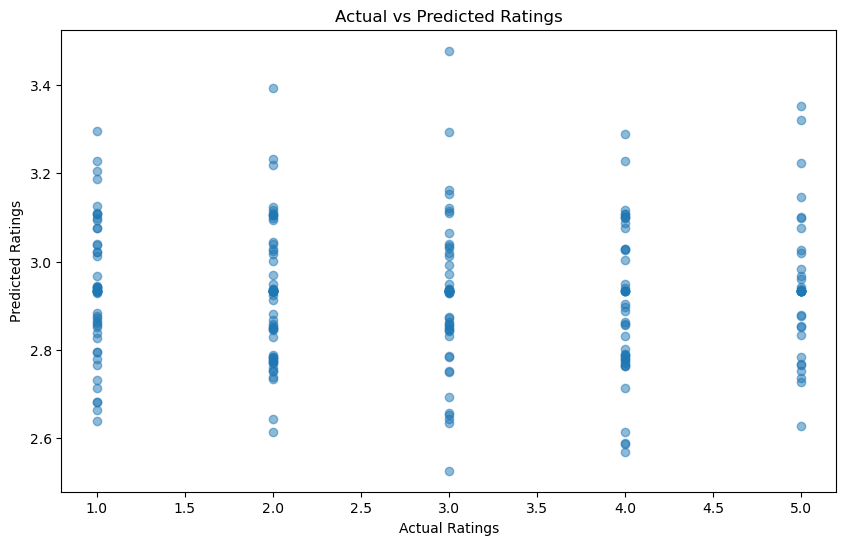

In [53]:
import matplotlib.pyplot as plt

actual_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

plt.figure(figsize=(10, 6))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [54]:
from surprise import accuracy
rmse = accuracy.rmse(predictions)


RMSE: 1.3711


In [55]:
import datetime

In [56]:
def is_month_in_range(current_month, month_range):

    start_month, end_month = month_range.split('-')
    

    month_numbers = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                     'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    
    start_month_num = month_numbers[start_month[:3]]
    end_month_num = month_numbers[end_month[:3]]


    if start_month_num > end_month_num:
        return current_month >= start_month_num or current_month <= end_month_num
    else:
        return start_month_num <= current_month <= end_month_num


In [134]:
def filter_destinations_by_season(destination_features, current_month):
   
    contextual_destinations = destination_features[destination_features['BestTimeToVisit'].apply(
        lambda x: is_month_in_range(current_month, x))]
    return contextual_destinations


current_month = datetime.datetime.now().month

destination_features = pd.DataFrame({
    'BestTimeToVisit': destination_profiles['BestTimeToVisit'],
    'DestinationID': destination_profiles['DestinationID']  # Note the corrected spelling here
})

contextual_destinations = filter_destinations_by_season(destination_features, current_month)
contextual_destinations

,BestTimeToVisit,DestinationID
0,Nov-Feb,1
1,Nov-Mar,2
2,Oct-Mar,3
3,Sep-Mar,4
5,Nov-Feb,6
...,...,...
993,Sep-Mar,994
995,Nov-Feb,996
996,Nov-Mar,997
997,Oct-Mar,998


In [135]:
def normalize_scores(scores, score_column):
    # Normalize scores to be between 0 and 1
    min_score = scores[score_column].min()
    max_score = scores[score_column].max()
    scores['NormalizedScore'] = (scores[score_column] - min_score) / (max_score - min_score)
    return scores


In [152]:
def combine_recommendations(similarity_scores, predicted_ratings, contextual_destinations):
    # Normalize similarity scores and predicted ratings
    normalized_similarity = normalize_scores(similarity_scores, 'Score')
    normalized_ratings = normalize_scores(predicted_ratings, 'Predicted_Rating')
    print(normalized_similarity)
    # Rename score columns to avoid confusion after merge
    normalized_similarity.rename(columns={'NormalizedScore': 'SimilarityScore'}, inplace=True)
    normalized_ratings.rename(columns={'NormalizedScore': 'RatingScore'}, inplace=True)

    # Merge the scores
    combined_scores = pd.merge(normalized_similarity, normalized_ratings, on=['UserID', 'DestinationID'], how='inner')
    print(combined_scores)
    # Filter to include only contextual destinations
    contextual_filter = combined_scores['DestinationID'].isin(contextual_destinations['DestinationID'])
    combined_contextual = combined_scores[contextual_filter]

    # Calculate weighted average of the scores (modify weights as needed)
    # Ensure that 'SimilarityScore' and 'RatingScore' are Series
    similarity_score_series = combined_contextual.filter(like='SimilarityScore').iloc[:, 0]
    rating_score_series = combined_contextual.filter(like='RatingScore').iloc[:, 0]
    
    combined_contextual['HybridScore'] = (similarity_score_series + rating_score_series) / 2

    # Return only the necessary columns to avoid confusion
    return combined_contextual[['UserID', 'DestinationID', 'HybridScore']]

# Make sure the normalize_scores function is defined and correctly normalizes the scores based on the column provided.


In [147]:
def get_top_n_recommendations(hybrid_recommendations, user_id, top_n):
    # Filter recommendations for the specified user
    user_recommendations = hybrid_recommendations[hybrid_recommendations['UserID'] == user_id]

    # Sort the recommendations by score in descending order and select the top N
    top_recommendations = user_recommendations.sort_values(by='HybridScore', ascending=False).head(top_n)

    # Return top recommendation destination IDs
    return top_recommendations['DestinationID'].tolist()

In [138]:
sorted_reviews = reviews_dataset.sort_values(by='DestinationID', ascending=True)

# Display the first few rows of the sorted dataset
sorted_reviews.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText,Sentiment
665,666,1,479,1,A historical wonder,0.000
129,130,2,528,3,Incredible monument!,0.000
89,90,2,558,2,A historical wonder,0.000
868,869,4,126,5,Loved the beaches!,0.636
401,402,5,947,1,A historical wonder,0.000


In [108]:
# Extract UserID and DestinationID from the respective datasets
user_ids = reviews_dataset['UserID']
destination_ids = destination_profiles['DestinationID']

# Flatten the similarity scores matrix
flattened_scores = []
for user_index, row in enumerate(similarity_scores):
    for dest_index, score in enumerate(row):
        current_user_id = user_ids[user_index]
        current_dest_id = destination_ids[dest_index]
        flattened_scores.append((current_user_id, current_dest_id, score))

# Convert to DataFrame
scores_df = pd.DataFrame(flattened_scores, columns=['UserID', 'DestinationID', 'Score'])

# Display the DataFrame
print(scores_df)

        UserID  DestinationID  Score
0          327              1    1.0
1          327              2    1.0
2          327              3    1.0
3          327              4    1.0
4          327              5    1.0
...        ...            ...    ...
998995     253            996    1.0
998996     253            997    1.0
998997     253            998    1.0
998998     253            999    1.0
998999     253           1000    1.0

[999000 rows x 3 columns]


In [116]:
testset
predicted_ratings_df = pd.DataFrame(testset, columns=['UserID', 'DestinationID', 'Rating'])
predicted_ratings_df = predicted_ratings_df[['UserID', 'DestinationID']]
predicted_ratings_df['Predicted_Rating'] = predicted_ratings
# Display the DataFrame
print(predicted_ratings_df.head())

   UserID  DestinationID  Predicted_Rating
0     706            306          2.752735
1     699              7          3.024676
2      15            701          2.779423
3     902            216          2.904462
4      60            421          3.001256


In [153]:
hybrid_recommendations = combine_recommendations(scores_df, predicted_ratings_df, contextual_destinations)


        UserID  DestinationID  Score  SimilarityScore  SimilarityScore  \
0          327              1    1.0              NaN              NaN   
1          327              2    1.0              NaN              NaN   
2          327              3    1.0              NaN              NaN   
3          327              4    1.0              NaN              NaN   
4          327              5    1.0              NaN              NaN   
...        ...            ...    ...              ...              ...   
998995     253            996    1.0              NaN              NaN   
998996     253            997    1.0              NaN              NaN   
998997     253            998    1.0              NaN              NaN   
998998     253            999    1.0              NaN              NaN   
998999     253           1000    1.0              NaN              NaN   

        SimilarityScore  SimilarityScore  SimilarityScore  SimilarityScore  \
0                   NaN          

/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_49012/1096550327.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_contextual['HybridScore'] = (similarity_score_series + rating_score_series) / 2


In [149]:
print(hybrid_recommendations)


     UserID  DestinationID  HybridScore
0       783            894          NaN
1       408            403          NaN
2       408            403          NaN
6        20            311          NaN
7        20            311          NaN
..      ...            ...          ...
242     826            413          NaN
243     990             81          NaN
244      16            176          NaN
245     942            984          NaN
246     346            113          NaN

[201 rows x 3 columns]


In [ ]:
def calculate_top_n_accuracy(top_recommendations, actual_preferences):
    # This function should compare the top recommendations with the user's actual preferences
    # and return the accuracy. Replace this with your actual accuracy calculation.
    correct_predictions = sum(destination in actual_preferences for destination in top_recommendations)
    return correct_predictions / len(top_recommendations)
